<a href="https://colab.research.google.com/github/salviyas/Wildfire-Prediction-Using-Logistic-Regression/blob/main/Wildfire_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
np.random.seed(42)

data=pd.DataFrame({
    'temperature':np.random.uniform(20,50,1000),
    'humidity':np.random.uniform(10,90,1000),
    'wind_speed':np.random.uniform(0,50,1000),
    'rainfall':np.random.uniform(0,10,1000),
    'fire_occured':np.random.choice([0,1],size=1000,p=[0.7,0.3])
})


In [ ]:
print(data.head())

   temperature   humidity  wind_speed  rainfall  fire_occured
0    31.236204  24.810634   13.085284  6.727030             0
1    48.521429  53.352076   12.348940  7.966814             1
2    41.959818  79.835667   45.312729  2.504679             1
3    37.959755  68.577991   12.477310  6.248741             0
4    24.680559  74.524892   13.597486  5.717460             0


In [ ]:
print(data.describe())

       temperature     humidity   wind_speed     rainfall  fire_occured
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     34.707697    50.561384    25.120286     4.903750      0.283000
std       8.764121    23.375191    14.533710     2.864893      0.450682
min      20.138961    10.257461     0.000582     0.006534      0.000000
25%      27.079198    29.285942    13.067549     2.419008      0.000000
50%      34.904221    51.498713    25.030696     4.842793      0.000000
75%      42.329588    70.837205    37.955176     7.375408      1.000000
max      49.991530    89.953098    49.891043     9.995577      1.000000


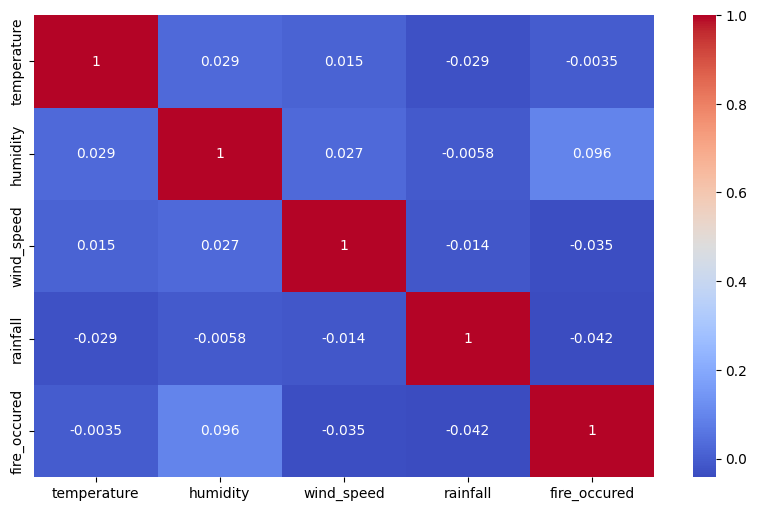

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
x=data[['temperature','humidity','wind_speed','rainfall']]
y=data['fire_occured']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.67


In [ ]:
print("classification report",classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.67      1.00      0.80       134
           1       0.00      0.00      0.00        66

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


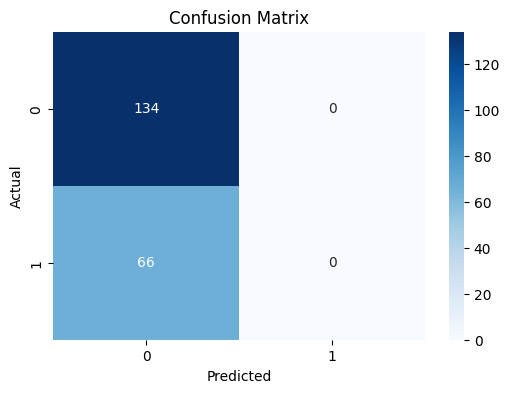

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-26-c01d1bcebb7f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


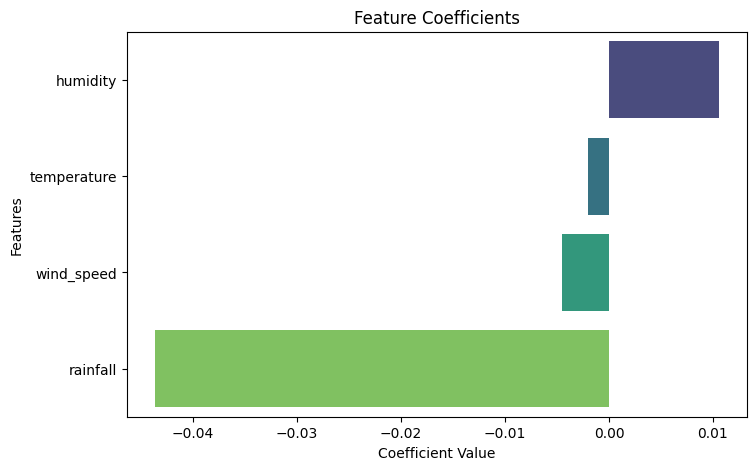

Model training and evaluation complete!


In [ ]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

print("Model training and evaluation complete!")
